# Telco Customer Churn Analysis

## Introduction

Telco: A telecommunication company is experiencing a massive customer loss. They intend solving this problem and hired you as a Data Analyst. 
It's your responsibility as the Data Analyst to come up with the Report or a Dashboard that best solve this problem. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_raw = pd.read_csv('Telco-Customer-Churn.csv')
df_raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df = df_raw.copy()

In [10]:
df.Churn.nunique()

2

In [11]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
df_churned = df[df.Churn == "Yes"]
df_churned

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [43]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [42]:
pd.to_numeric?

In [16]:
df_no_churned = df[df.Churn == "No"]
df_no_churned

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
'Contract','PaymentMethod','TechSupport','MultipleLines','DeviceProtection','InternetService',
'MonthlyCharges','OnlineSecurity','PaperlessBilling','OnlineBackup', 'SeniorCitizen',

In [13]:
df_churned.customerID.nunique()

1869

In [14]:
df.customerID.nunique()

7043

In [70]:
churn_rate = round((df_churned.customerID.count()/df.customerID.count())*100)
churn_rate

27

In [34]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [35]:
df_churned.PaymentMethod.value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

In [89]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [90]:
df_churned.InternetService.value_counts()

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

In [91]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [85]:
df_churned.Contract.value_counts()

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

In [139]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [138]:
df_churned.PaymentMethod.value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='Churn'>

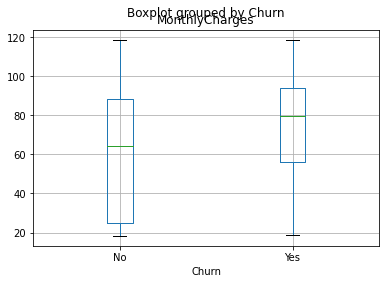

In [38]:
df.boxplot(column='MonthlyCharges', by="Churn")

<AxesSubplot:title={'center':'TotalCharges'}, xlabel='Churn'>

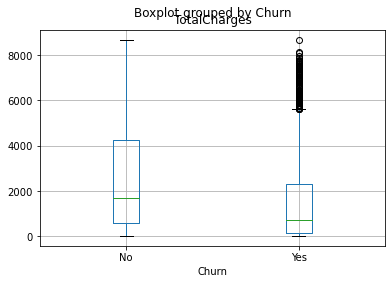

In [44]:
df.boxplot(column='TotalCharges', by="Churn")

In [72]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.PaymentMethod == "Electronic check")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

93

In [73]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.TechSupport == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

94

In [77]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.TechSupport == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

85

In [78]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.OnlineSecurity == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

95

In [79]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.DeviceProtection == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

92

In [80]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.MultipleLines == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

92

In [81]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.OnlineBackup == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

93

In [82]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.PaperlessBilling == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

92

In [83]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.SeniorCitizen == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

89

In [84]:
round((df_churned[(df_churned.Contract == "Month-to-month")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

89

In [88]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.InternetService == "Fiber optic")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

96

In [141]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.PaperlessBilling == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

92

In [103]:
round((df_churned[(df_churned.InternetService == "Fiber optic")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

69

In [174]:
round((df_churned[(df_churned.TechSupport == "No")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

77

In [157]:
round((df_churned[(df_churned.Contract == "Month-to-month") | (df_churned.InternetService == "Fiber optic") | (df_churned.TechSupport == "No")]\
       ['Contract'].count()/df_churned.customerID.count()), 2)*100

97.0

In [160]:
round((df_churned[(df_churned.PaymentMethod == "Electronic check") & (df_churned.TechSupport == "No")]\
       ['Contract'].count()/df_churned.customerID.count()),2)*100

49.0

In [161]:
df_churn_elect_pay = df_churned[df_churned.PaymentMethod == "Electronic check"]

In [173]:
round((df_churn_elect_pay[(df_churn_elect_pay.TechSupport == "No") | (df_churn_elect_pay.Contract == "Month-to-month")]\
       ['Contract'].count()/df_churn_elect_pay.customerID.count())*100)

97

In [167]:
df_no_churn_elect_pay = df_no_churned[df_no_churned.PaymentMethod == "Electronic check"]

In [172]:
round((df_no_churn_elect_pay[(df_no_churn_elect_pay.TechSupport == "Yes") | (df_no_churn_elect_pay.Contract != "Month-to-month")]\
       ['Contract'].count()/df_no_churn_elect_pay.customerID.count())*100)

47

In [203]:
str(round((df_no_churn_fiber[(df_no_churn_fiber.TechSupport == "Yes")]\
       ['Contract'].count()/df_no_churn_fiber.customerID.count())*100))\
+"% of Non churning customers that use fiber optics internet service have tech support"

'37% of Non churning customers that use fiber optics internet service have tech support'

In [130]:
round((df_churned[(df_churned.InternetService == "Fiber optic") & (df_churned.TechSupport == "Yes")]\
       ['Contract'].count()/df_churned.customerID.count())*100)

69

In [200]:
str(round((df_churned[(df_churned.InternetService == "Fiber optic")]\
       ['Contract'].count()/df_churned.customerID.count())*100))+"% of churning customers use fiber optics internet service"

'69% of churning customers use fiber optics internet service'

In [201]:
str(round((df_churned[(df_churned.PaymentMethod == "Electronic check")]\
       ['Contract'].count()/df_churned.customerID.count())*100))+"% of churning customers use\
       electronic check as prefered payment method"

'57% of churning customers use       electronic check as prefered payment method'

In [129]:
round((df_no_churned[(df_no_churned.InternetService == "Fiber optic") & (df_no_churned.TechSupport == "Yes")]\
       ['Contract'].count()/df_no_churned.customerID.count())*100)

34

In [131]:
df_churn_fiber = df_churned[df_churned.InternetService == "Fiber optic"]

In [134]:
round((df_churn_fiber[(df_churn_fiber.TechSupport == "No")]\
       ['Contract'].count()/df_churn_fiber.customerID.count())*100)

85

In [202]:
str(round((df_churn_fiber[(df_churn_fiber.TechSupport == "No")]\
       ['Contract'].count()/df_churn_fiber.customerID.count())*100))\
+"% of churning customers that use fiber optics internet service do not have tech support"

'85% of churning customers that use fiber optics internet service do not have tech support'

In [135]:
df_no_churn_fiber = df_no_churned[df_no_churned.InternetService == "Fiber optic"]

In [137]:
round((df_no_churn_fiber[(df_no_churn_fiber.TechSupport == "Yes")]\
       ['Contract'].count()/df_no_churn_fiber.customerID.count())*100)

37

In [186]:
round((df_no_churned[(df_no_churned.TechSupport == "Yes")]\
       ['Contract'].count()/df_no_churned.customerID.count())*100)

34

In [185]:
df.groupby('TechSupport').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
TechSupport,,,,,,,,,,,,,,,,,,,,
No,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3472,3473
No internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1520,1526
Yes,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2040,2044


In [179]:
round((df_no_churned[(df_no_churned.Contract != "Month-to-month") & (df_no_churned.InternetService == "Fiber optic")]\
       ['Contract'].count()/df_no_churned.customerID.count())*100)

16

In [115]:
round((df_no_churned[(df_no_churned.Contract != "Month-to-month") & (df_no_churned.OnlineSecurity != "No")]\
       ['Contract'].count()/df_no_churned.customerID.count())*100)

43

In [191]:
df_churned.groupby('Dependents')['customerID'].count()

Dependents
No     1543
Yes     326
Name: customerID, dtype: int64

In [192]:
df.groupby('Dependents')['customerID'].count()

Dependents
No     4933
Yes    2110
Name: customerID, dtype: int64

<AxesSubplot:xlabel='tenure'>

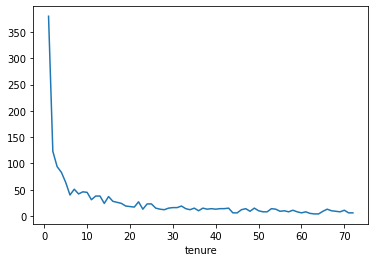

In [194]:
df_churned.groupby('tenure')['customerID'].count().plot()

<AxesSubplot:xlabel='tenure'>

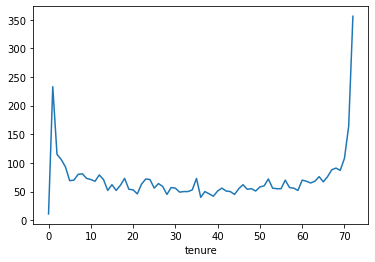

In [195]:
df_no_churned.groupby('tenure')['customerID'].count().plot()

In [ ]:
order_category_count_ = order_category_count.sort_values('sales_volume', ascending=True).head(10)
order_category_count_top = order_category_count_.head(5)
order_category_count_last = order_category_count_.tail(5)
fig, ax = plt.subplots(figsize=(10, 4))
# for year, color in zip([2017, 2018],['gray', 'green']):
#     global ax
#     year_data = order_count_[order_count_.year == year]
#     ax.barh(year_data.month, year_data.No_of_orders, color=color)

ax.barh(order_category_count_top.index, order_category_count_top.sales_volume, color="gray")
ax.barh(order_category_count_last.index, order_category_count_last.sales_volume, color="green")
# ax.set_xticks(np.arange(0, 13))
# ax.set_xticklabels(month_order)
ax.set_xlabel("Sales Volume", fontsize=10)
ax.set_title("Top Selling product categories", fontsize=15)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.text(2,7000, "2018")
# ax.text(2,2500, "2017")

# ax.legend()

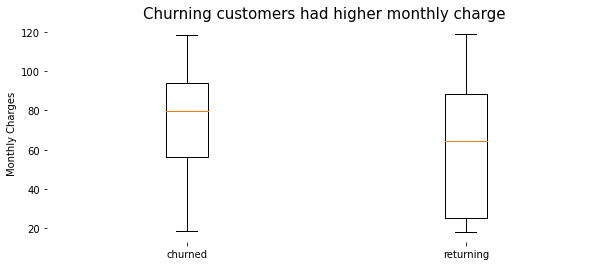

In [199]:
to_plot = [df_churned.MonthlyCharges, df_no_churned.MonthlyCharges]
fig, ax = plt.subplots(figsize=(10, 4))
ax.boxplot(to_plot, labels=["churned", "returning"])

ax.set_ylabel("Monthly Charges", fontsize=10)
ax.set_title("Churning customers had higher monthly charge ", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

In [204]:
df_churned_by_pay_method = df_churned.groupby('PaymentMethod').agg(no_of_customers = ('customerID','count'))\
.sort_values('no_of_customers', ascending=False)
df_churned_by_pay_method

,no_of_customers
PaymentMethod,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232


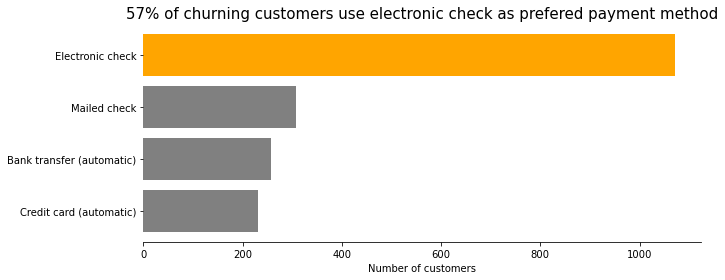

In [205]:
df_churned_by_pay_method_ = df_churned_by_pay_method.sort_values('no_of_customers', ascending=True)
df_churned_by_contract_top = df_churned_by_pay_method_.tail(1)
df_churned_by_contract_last = df_churned_by_pay_method_.head(3)

fig, ax = plt.subplots(figsize=(10, 4))


ax.barh(df_churned_by_contract_last.index, df_churned_by_contract_last.no_of_customers, color="gray")
ax.barh(df_churned_by_contract_top.index, df_churned_by_contract_top.no_of_customers, color="orange")

ax.set_xlabel("Number of customers", fontsize=10)
ax.set_title("57% of churning customers use electronic check as prefered payment method", fontsize=15)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

In [206]:
df_churned_by_internet_service = df_churned.groupby('InternetService').agg(no_of_customers = ('customerID','count'))\
.sort_values('no_of_customers', ascending=False)
df_churned_by_internet_service

,no_of_customers
InternetService,
Fiber optic,1297
DSL,459
No,113


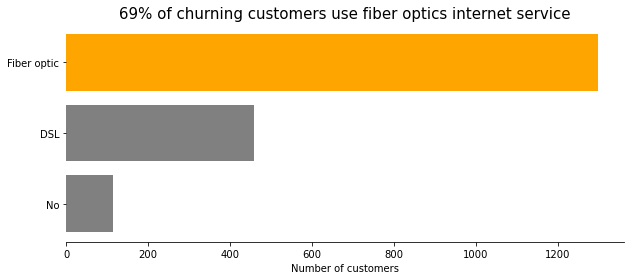

In [207]:
df_churned_by_internet_service_ = df_churned_by_internet_service.sort_values('no_of_customers', ascending=True)
df_churned_by_contract_top = df_churned_by_internet_service_.tail(1)
df_churned_by_contract_last = df_churned_by_internet_service_.head(2)

fig, ax = plt.subplots(figsize=(10, 4))


ax.barh(df_churned_by_contract_last.index, df_churned_by_contract_last.no_of_customers, color="gray")
ax.barh(df_churned_by_contract_top.index, df_churned_by_contract_top.no_of_customers, color="orange")

ax.set_xlabel("Number of customers", fontsize=10)
ax.set_title("69% of churning customers use fiber optics internet service", fontsize=15)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)